In [1]:
# BUSINESS PROBLEM: hotels and resort hotel have been high cancellation rates.
#primary goal is to increase thier effeciency in generating revenue and to offer thorough business advice
#to address this problem

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("D:\\python\\__pycache__\\data_sets")#changing dir
plt.style.use('ggplot')

In [3]:
# 1)exploratory data analysis and data cleaning
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [4]:
# reading the csv file in to the pandas
df=pd.read_csv('hotel_bookings.csv')

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [6]:
df.shape

(119390, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
#changing the object format to the data time format
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [10]:
df.describe(include=object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [11]:
#printing the different types of unique values in columns
for i in df.describe(include=object).columns:
    print(i)
    print(df[i].unique())
    print('-----------------------------')


hotel
['Resort Hotel' 'City Hotel']
-----------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
-----------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
-----------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT

In [12]:
#dealing with the missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
#removing the coloums having most of them null values
df.drop(columns=['agent','company'],inplace=True)

In [14]:
#removing the rows consisting with missing values
df.dropna(inplace=True)

In [15]:
#overviewing the insights of the data
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [16]:
#removing the outliyer in the 'adr' column using filter
df=df[df['adr']<5000]

In [17]:
#2)data_analysis and visualizations
color=sns.color_palette('nipy_spectral')

Text(0.5, 1.0, 'market_segment')

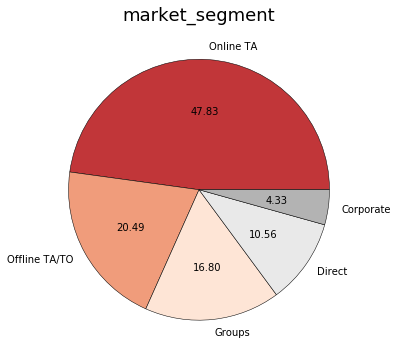

In [18]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
kolours=sns.color_palette('RdGy')
label=df['market_segment'].value_counts().head(5).index
slices=df['market_segment'].value_counts().head(5)
plt.pie(slices,labels=label,colors=kolours,wedgeprops={'edgecolor':'k'},autopct='%.2f')
plt.title('market_segment',fontsize=18)

In [19]:
#calculating the percentage of cancelation of the bookings
cancel_per=df['is_canceled'].value_counts(normalize=True)
cancel_per

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

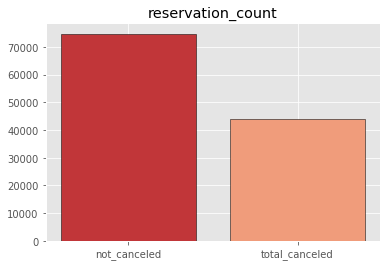

In [20]:
#vizvalizing the cancelatinon data
plt.style.use("ggplot")
plt.title('reservation_count')
# colour=['#f5f5f5','#D9544D']
plt.bar(['not_canceled','total_canceled'],df['is_canceled'].value_counts(),edgecolor='k',color=kolours)
plt.show()

In [21]:
#creating the group by the type of hotel
type_hotel=df.groupby(['hotel'])

In [22]:
cancel=type_hotel['is_canceled'].value_counts()
cancel

hotel         is_canceled
City Hotel    0              46226
              1              33075
Resort Hotel  0              28519
              1              11077
Name: is_canceled, dtype: int64

Text(0.5, 1.0, ' city_hotel and resort_hotel chart')

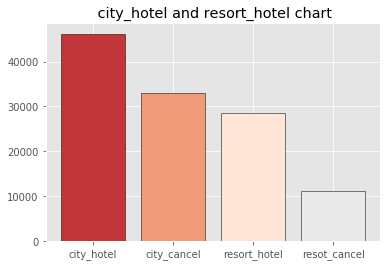

In [23]:
#vizvalizing the data of cancelation for different hotels
# colour=['#f5f5f5','#D9544D','#f5f5f5','#D9544D']

plt.bar(['city_hotel','city_cancel','resort_hotel','resot_cancel'],cancel,edgecolor='k',color=kolours)
plt.title(' city_hotel and resort_hotel chart')


In [24]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07


In [25]:
#percentage of canceleing resort hotels
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [26]:
#percentage of cancelinng city hotels
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [27]:
resort_hotel=resort_hotel.groupby('reservation_status_date')['adr'].mean()



In [28]:
city_hotel=city_hotel.groupby('reservation_status_date')['adr'].mean()

In [29]:
city_cancel=df[df['hotel']=='City Hotel']
city_cancel=city_cancel.groupby('reservation_status_date')['is_canceled'].sum()


In [30]:
city_cancel

reservation_status_date
2014-10-17    180
2015-01-01    760
2015-01-05      3
2015-01-06      6
2015-01-07      4
             ... 
2017-12-04     25
2017-12-05     28
2017-12-06     19
2017-12-07     24
2017-12-08      4
Name: is_canceled, Length: 864, dtype: int64

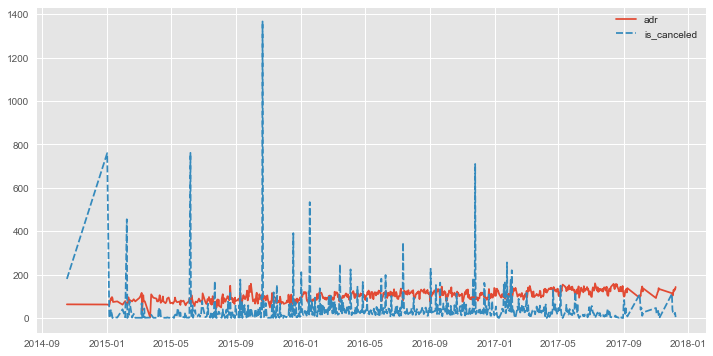

In [48]:
plt.figure(figsize=(12,6))
plt.style.use("ggplot")
sns.lineplot(data=[city_hotel,city_cancel])


In [32]:
df['month']=df['reservation_status_date'].dt.month
df['month'].value_counts()

10    10914
7     10641
1     10536
8     10482
6     10399
3     10111
2      9781
9      9773
4      9690
5      9651
11     8985
12     7934
Name: month, dtype: int64

In [33]:
hotel_grp=df[df['hotel']=='Resort Hotel'].groupby('month')[['is_canceled']].sum()

In [34]:
hotel_grp2=df[df['hotel']=='City Hotel'].groupby('month')[['is_canceled']].sum()

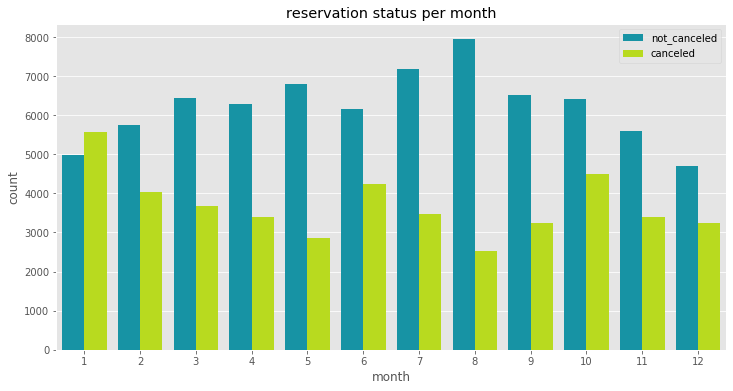

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x='month',hue='is_canceled',data=df,palette='nipy_spectral')
plt.title('reservation status per month')
plt.legend(['not_canceled','canceled'])



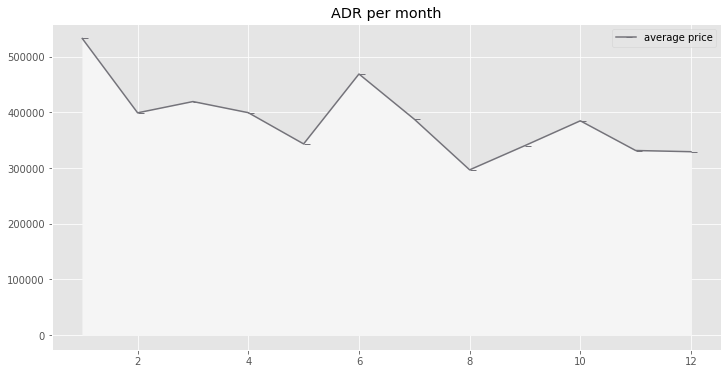

In [36]:
#getting average price for a month
data=df[df['is_canceled']==1].groupby('month')[['adr']].sum()
plt.figure(figsize=(12,6))
plt.plot(data.index,data['adr'],color='#74737A',label='average price',marker=True)
plt.fill_between(data.index,data['adr'],color='#f5f5f5')
plt.title('ADR per month')
plt.legend()

In [37]:
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,month
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,6.386393
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,3.390731
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,3.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,6.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,9.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,12.000000


In [38]:
#higest cancelation rate in the country
country_grp=df[df['is_canceled']==1].groupby('country')[['is_canceled']].sum()

In [39]:
country_grp.sort_values(by='is_canceled',ascending=False,inplace=True)
country_grp['is_canceled'].head(5)

country
PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'most_canceled_countries')

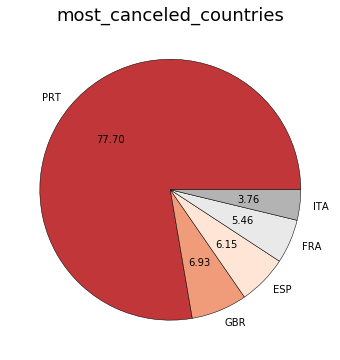

In [40]:
#ploting the countries in the pie plot
plt.figure(figsize=(12,6))
# kolours=sns.color_palette('RdGy')
label=country_grp['is_canceled'].head(5).index
slices=country_grp['is_canceled'].head(5)
plt.pie(slices,labels=label,colors=kolours,wedgeprops={'edgecolor':'k'},autopct='%.2f')
plt.title('most_canceled_countries',fontsize=18)

In [41]:
#identifing from where the most of the customers are coming from
df['market_segment'].value_counts().head(5).index

Index(['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate'], dtype='object')

In [42]:
market_segment=df.groupby(['customer_type'])[['is_canceled']].sum()

In [43]:
market_segment.index

Index(['Contract', 'Group', 'Transient', 'Transient-Party'], dtype='object', name='customer_type')

In [44]:
market_segment=market_segment.sort_values(by='is_canceled',ascending=False)

In [45]:
#cancelatons by room classification
room_type=df.groupby(['assigned_room_type'])[['is_canceled']].sum()

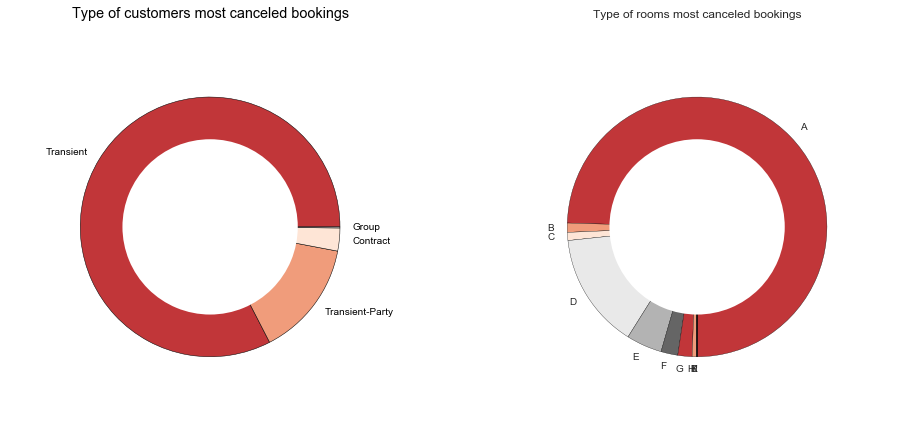

In [46]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
color=sns.color_palette('RdBu_r')
plt.pie(market_segment['is_canceled'].values,labels=market_segment.index,wedgeprops={'edgecolor':'k'},radius=0.8,colors=kolours)
plt.pie([1],radius=0.54,colors='w')
plt.title('Type of customers most canceled bookings')
plt.style.use("seaborn")
plt.subplot(1,2,2)
color=sns.color_palette('RdBu_r')
plt.pie(room_type['is_canceled'].values,labels=room_type.index,wedgeprops={'edgecolor':'k'},radius=0.8,colors=kolours,startangle=270)
plt.pie([1],radius=0.54,colors='w')
plt.title('Type of rooms most canceled bookings')
plt.style.use("seaborn")
plt.show()

In [47]:
room_type

,is_canceled
assigned_room_type,
A,32904
B,508
C,444
D,6357
E,1962
F,926
G,780
H,251
I,5
